#  Klasifikasi Hasil Clustering

# **1. Import Library**

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [163]:
coklat_data = pd.read_csv(r"chocolate_bars_dengan_label.csv")
coklat_data.head()

,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,review,rating,rating_category,B,S,S*,C,V,L,Sa,Cluster
0,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"rich cocoa, fatty, bready",3.25,Recommended,1,1,1,1,0,0,0,2
1,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"cocoa, vegetal, savory",3.50,Highly Recommended,1,1,1,1,0,0,0,2
2,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"cocoa, blackberry, full body",3.75,Highly Recommended,1,1,1,1,0,0,0,2
3,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"chewy, off, rubbery",3.00,Recommended,1,1,1,1,0,0,0,2
4,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"fatty, earthy, moss, nutty,chalky",3.00,Recommended,1,1,1,1,0,0,0,2


# **3. Data Splitting**

In [164]:
y = coklat_data.Cluster
features = ['cocoa_percent','num_ingredients','rating','B', 'S', 'S*', 'C', 'V', 'L', 'Sa']
X = coklat_data[['cocoa_percent','num_ingredients','rating','B', 'S', 'S*', 'C', 'V', 'L', 'Sa']]

y.head()

0    2
1    2
2    2
3    2
4    2
Name: Cluster, dtype: int64

In [165]:
X.head()

,cocoa_percent,num_ingredients,rating,B,S,S*,C,V,L,Sa
0,76.0,3.0,3.25,1,1,1,1,0,0,0
1,76.0,3.0,3.50,1,1,1,1,0,0,0
2,76.0,3.0,3.75,1,1,1,1,0,0,0
3,68.0,3.0,3.00,1,1,1,1,0,0,0
4,72.0,3.0,3.00,1,1,1,1,0,0,0


In [166]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0,test_size=0.25)
print(len(train_X), len(val_X))
print(len(train_y),len(val_y))

1897 633
1897 633


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [ ]:
model = DecisionTreeClassifier(random_state=0)
model.fit(train_X,train_y)

DecisionTreeClassifier(random_state=0)

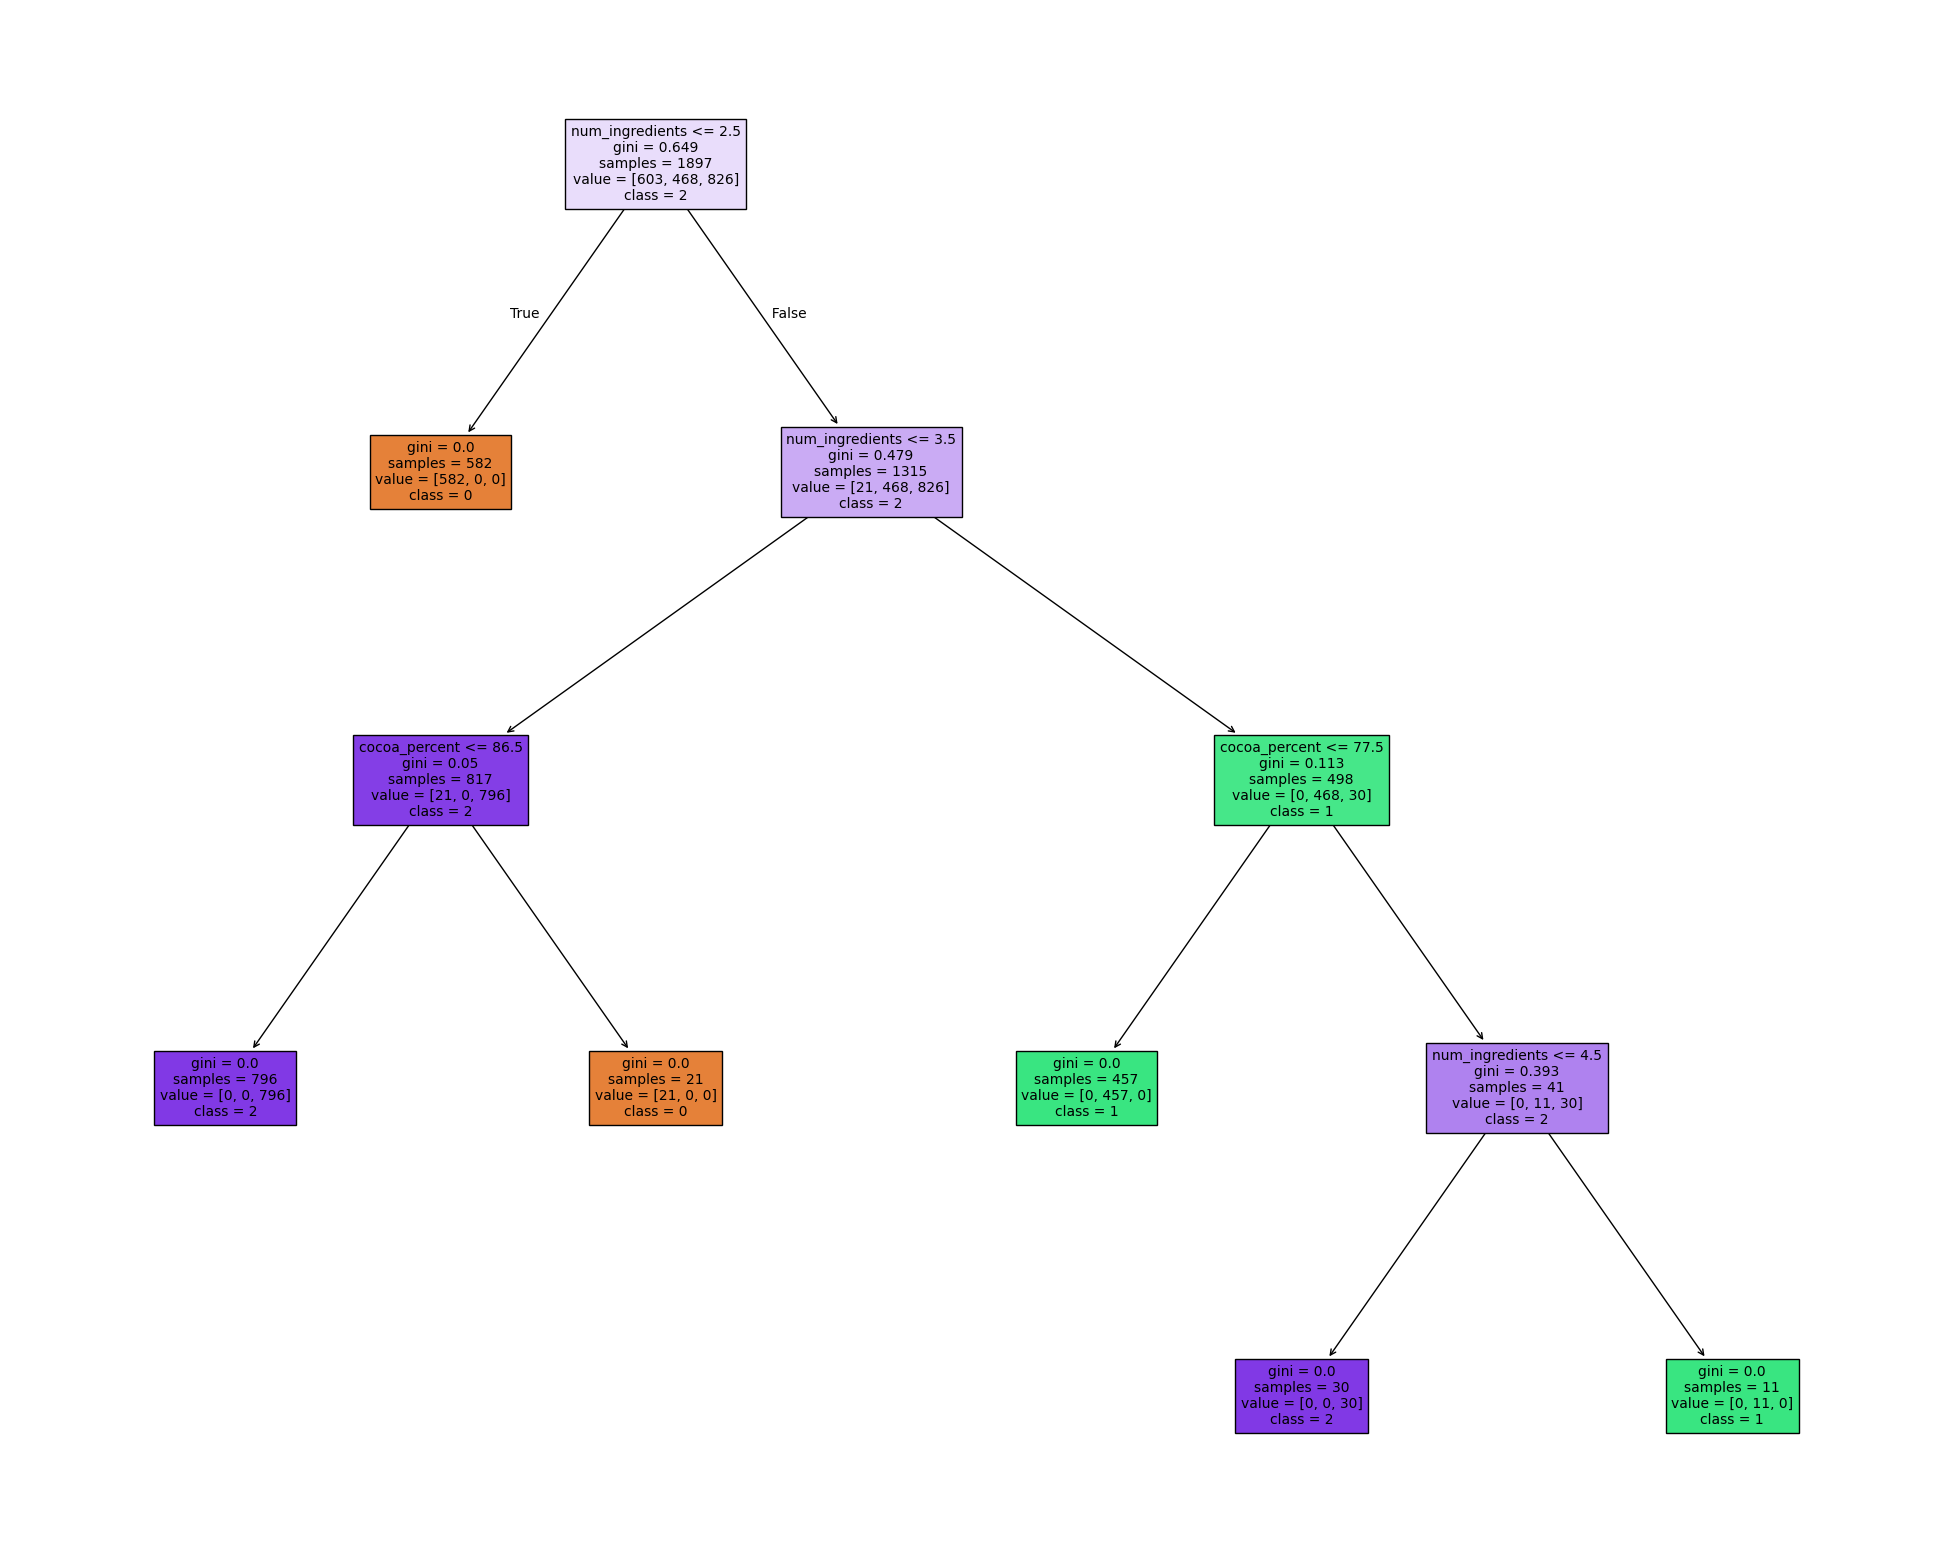

In [168]:
cluster_names = ['0','1','2']
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model,
                  feature_names=features,
                  class_names=cluster_names,
                  filled=True,
                  fontsize=10)

#### Metode yang Digunakan

Metode yang digunakan adalah decision tree classifier. Algoritma memulai dari akar pohon dan memilih fitur yang paling efektif dalam membagi data menjadi subset yang paling homogen. Efektivitas fitur ini biasanya diukur menggunakan metrik seperti Gini Impurity, Information Gain, atau Chi-square.
Pada setiap simpul (node), algoritma mencari titik pemisah (split point) terbaik yang memaksimalkan homogenitas dari data yang dipecah.
Proses ini diulang untuk setiap subset hingga memenuhi kriteria berhenti tertentu, seperti kedalaman maksimum pohon, jumlah minimum sampel di setiap daun, atau tidak ada peningkatan signifikan dalam homogenitas setelah pemisahan.

Parameter yang ditentukan adalah tinggi pohon , dimana tinggi pohon berpengaruh ke kompleksitas dan akurasi decision tree , pohon yang memiliki terlalu banyak cabang akan rentan overfitting dan terlalu sedikit percabangan akan rentan underfitting. Pencarian tinggi terbaik pohon dilakukan dengan iterasi dari range 1-21

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

skor prediksi untuk data validasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      0.97      0.99       155
           2       0.99      1.00      0.99       296

    accuracy                           0.99       633
   macro avg       1.00      0.99      0.99       633
weighted avg       0.99      0.99      0.99       633



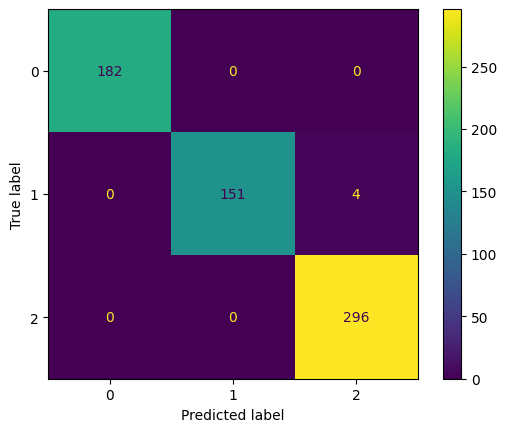

In [169]:
#Metrik evaluasi
pred = model.predict(val_X)
print("skor prediksi untuk data validasi")
print(classification_report(val_y,pred))

#Matriks Confusion
cm = confusion_matrix(val_y, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

skor prediksi untuk data training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       826

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



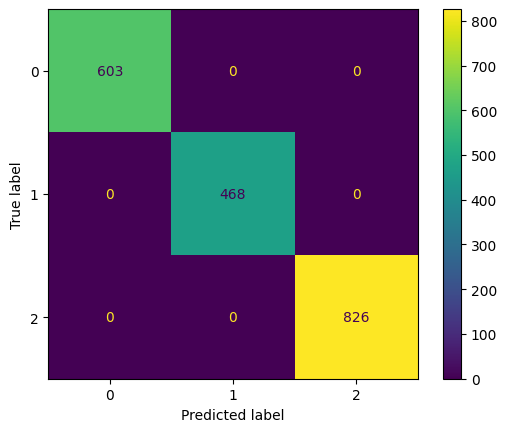

In [170]:
#Metrik evaluasi
print("skor prediksi untuk data training")
pred_train = model.predict(train_X)
print(classification_report(pred_train,train_y))

#Confusion Matrix
cm = confusion_matrix(train_y, pred_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya. (Hasil Evaluasi pada algoritma kedua (Random Forest berada di bawah notebook), hasil random forest hampir sama dengan model decision tree)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [171]:
def get_accuracy(max_depth, train_X, val_X, train_y, val_y):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(train_X, train_y)
    predictions = clf.predict(val_X)
    accuracy = np.sum(predictions == val_y) / len(val_y)
    return accuracy

candidate_max_depth = range(1, 21)

best_accuracy = 0
best_depth = 1
for depth in candidate_max_depth:
    current_accuracy = get_accuracy(depth, train_X, val_X, train_y, val_y)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_depth = depth

#menyimpan kedalaman pohon dengan akurasi terbaik
best_tree_depth = best_depth
print(f"Best max_depth: {best_tree_depth} with accuracy: {best_accuracy}")

Best max_depth: 4 with accuracy: 0.9936808846761453


## **d. Evaluasi Model Klasifikasi setelah Tuning**

In [172]:
model_tree_akhir = DecisionTreeClassifier(random_state=0,max_depth=4)
model_tree_akhir.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=4, random_state=0)

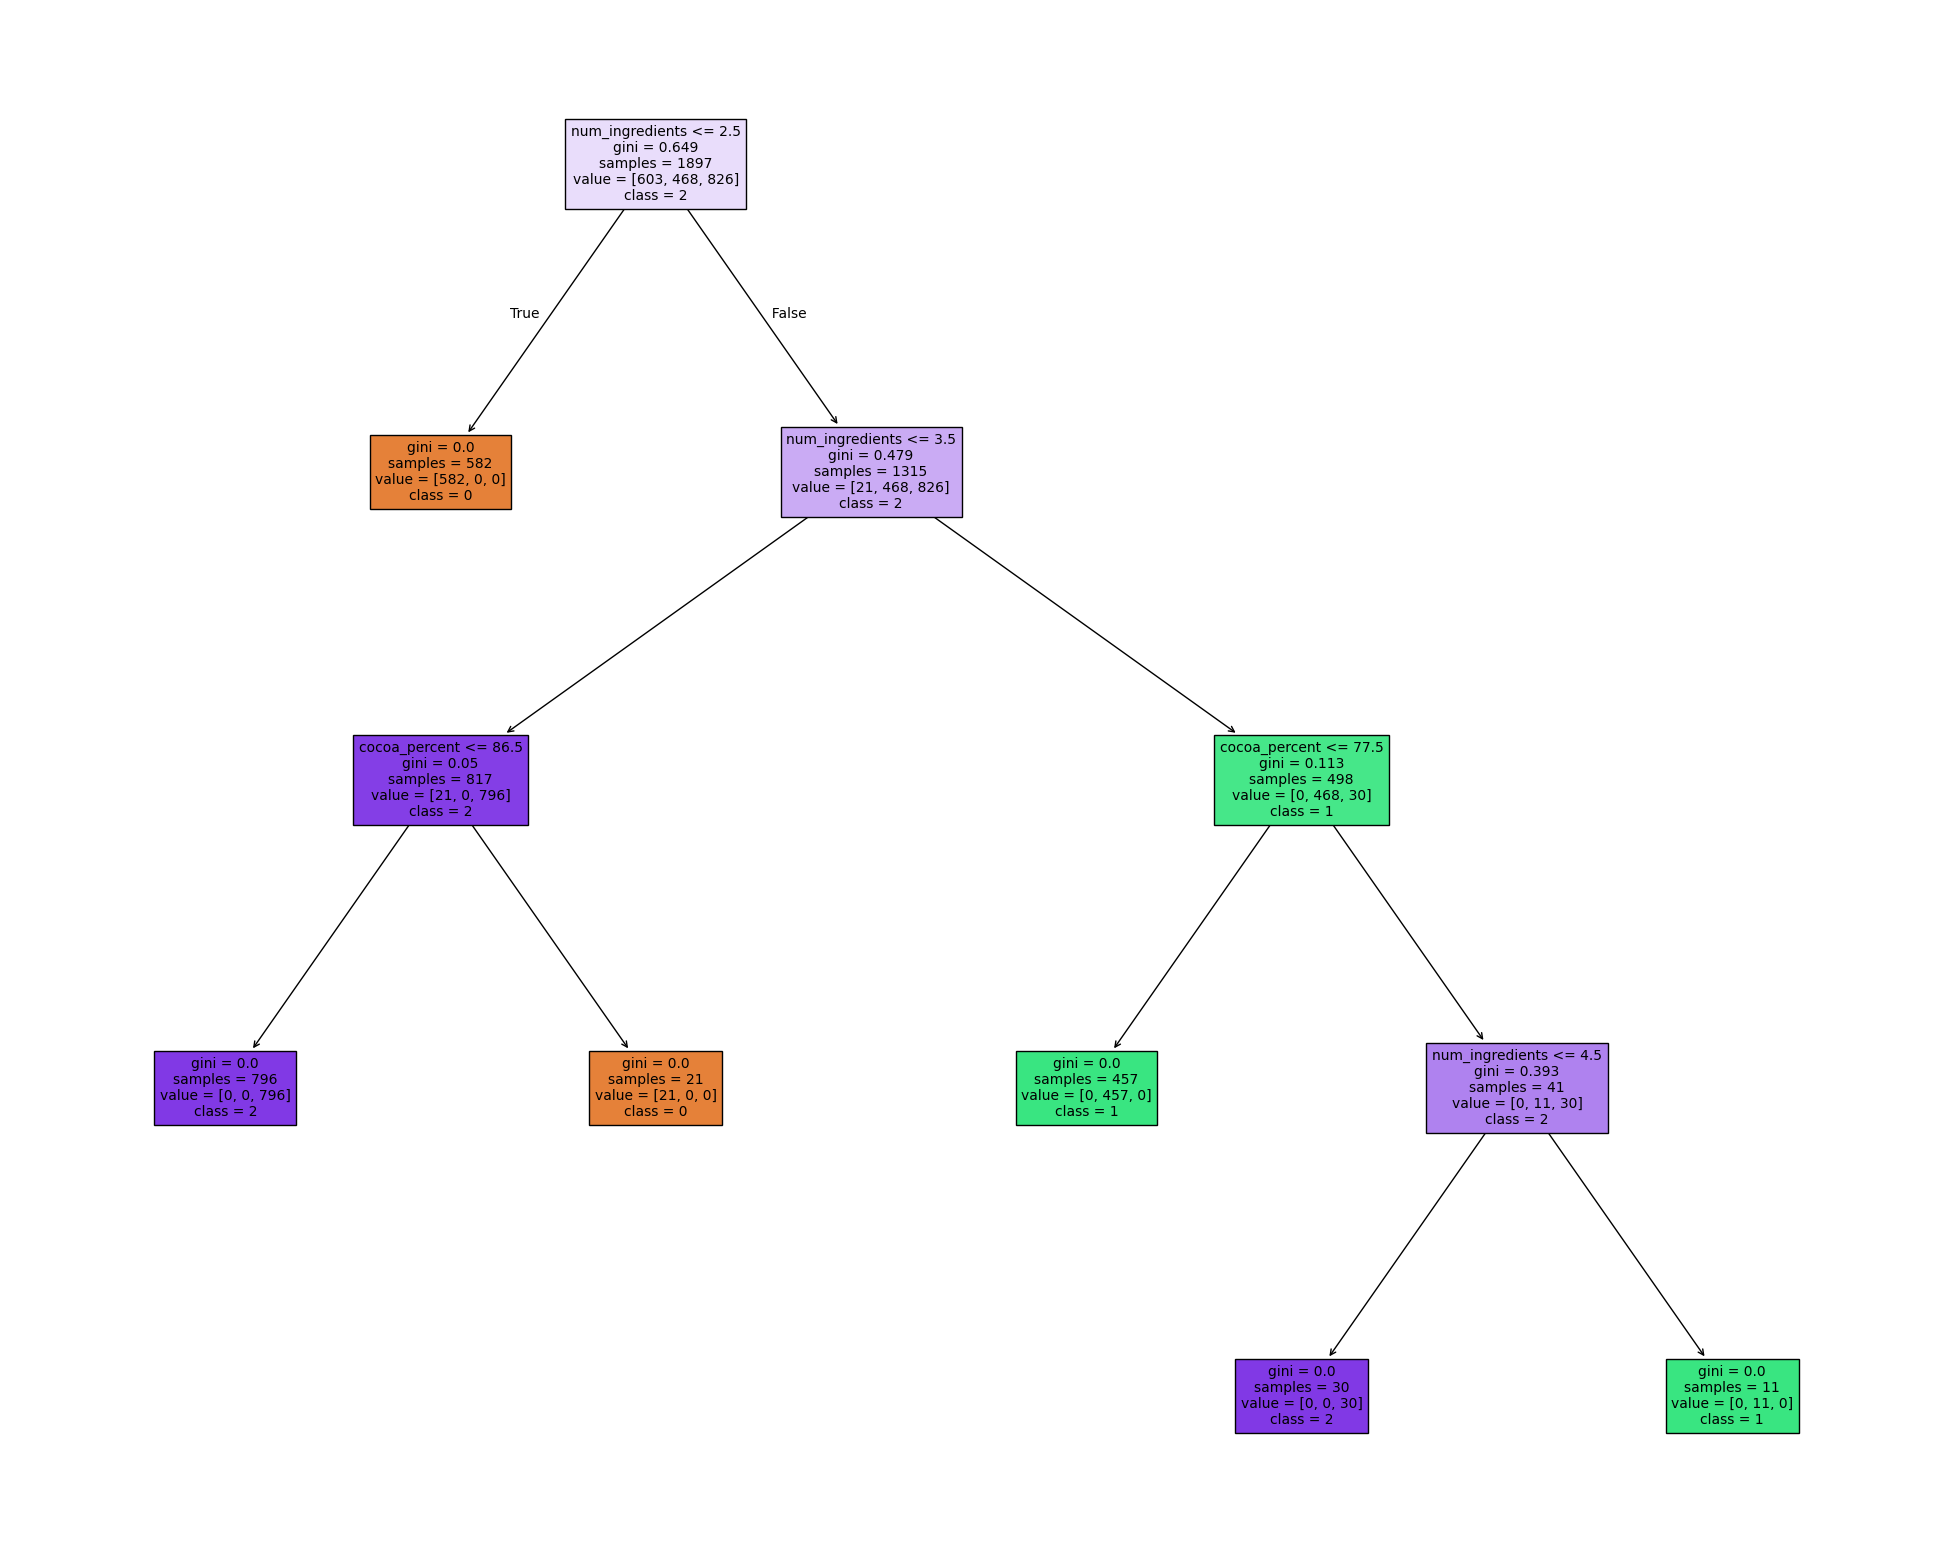

In [173]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(model_tree_akhir,
                  feature_names=features,
                  class_names=cluster_names,
                  filled=True,
                  fontsize=10)

skor prediksi untuk data validasi
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       182
           1       1.00      0.97      0.99       155
           2       0.99      1.00      0.99       296

    accuracy                           0.99       633
   macro avg       1.00      0.99      0.99       633
weighted avg       0.99      0.99      0.99       633



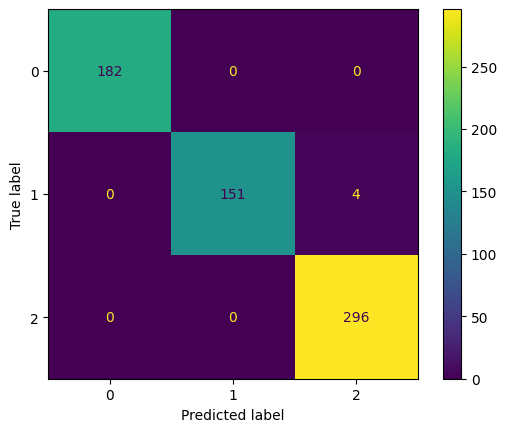

In [174]:
#Metrik evaluasi
pred = model.predict(val_X)
print("skor prediksi untuk data validasi")
print(classification_report(val_y,pred))

#Matriks Confusion
cm = confusion_matrix(val_y, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

skor prediksi untuk data training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       826

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



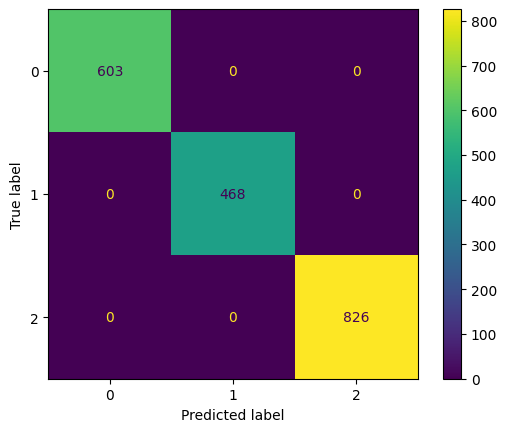

In [175]:
#Metrik evaluasi
print("skor prediksi untuk data training")
pred_train = model.predict(train_X)
print(classification_report(pred_train,train_y))

#Confusion Matrix
cm = confusion_matrix(train_y, pred_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Perbandingan hasil evaluasi setelah tuning dilakukan tidak ada perubahan walaupun max_depth tree terbaik sudah ditemukan, kemungkinan ini terjadi dikarenakan split sudah optimal tanpa perlu tuning hyperparameter.

Precision dan Recall tidak ada yang rendah untuk kelas tertentu , bahkan 0.97 yang terkecil untuk class 1.

Model tidak mengalami overfitting atau underfitting, dapat dilihat dari perbandingan akurasi data train yang tidak berbeda jauh dengan data validasi yang menandakan tidak overfitting. Dapat dilihat juga akurasi pada data train dan validasi yang tinggi menandakan model tidak underfitting.

Tindakan lanjutan yang diambil mungkin adalah mencoba mencari kaitanya bahan tambahan lainya dengan rasa coklat yang mungkin mempengaruhi rating.

Algoritma Lain yang akan dicoba adalah Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
def get_accuracy_forest(n, train_X, val_X, train_y, val_y):
    clf = RandomForestClassifier(n_estimators=n,random_state=0)
    clf.fit(train_X, train_y)
    predictions = clf.predict(val_X)
    accuracy = np.sum(predictions == val_y) / len(val_y)
    return accuracy

candidate_max_estimator = range(1, 100)

best_accuracy = 0
best_estimator = 1
for estimator in candidate_max_estimator:
    current_accuracy = get_accuracy_forest(estimator, train_X, val_X, train_y, val_y)
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_estimator =estimator

#menyimpan kedalaman pohon dengan akurasi terbaik
best_forest_estimator = best_estimator
print(f"Best n_estimator: {best_forest_estimator} with accuracy: {best_accuracy}")

Best n_estimator: 4 with accuracy: 0.990521327014218


In [178]:
model_forest = RandomForestClassifier(n_estimators=4 , random_state=0)
model_forest.fit(train_X,train_y)


RandomForestClassifier(n_estimators=4, random_state=0)

skor prediksi untuk data validasi
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       182
           1       0.99      0.97      0.98       155
           2       0.98      1.00      0.99       296

    accuracy                           0.99       633
   macro avg       0.99      0.99      0.99       633
weighted avg       0.99      0.99      0.99       633



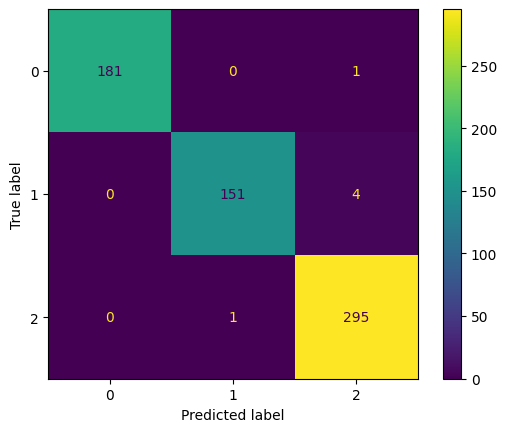

In [179]:
#Metrik evaluasi
pred = model_forest.predict(val_X)
print("skor prediksi untuk data validasi")
print(classification_report(val_y,pred))


#Matriks Confusion
cm = confusion_matrix(val_y, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()


skor prediksi untuk data training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       603
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       826

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



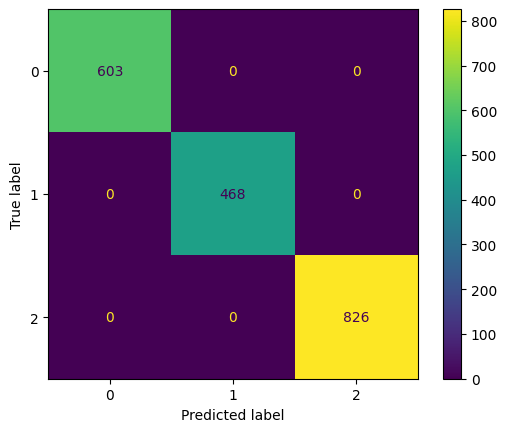

In [180]:
#Metrik evaluasi
print("skor prediksi untuk data training")
pred_train = model_forest.predict(train_X)
print(classification_report(pred_train,train_y))

#Confusion Matrix
cm = confusion_matrix(train_y, pred_train, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

Pada akhirnya model yang akan dipilih adalah decision tree dikarenakan skor metrik-metrik klasifikasi tidak berbeda jauh dengan model random forest. Decision tree juga lebih simple dan ringan komputasi saat melakukan prediksi dikarenakan random forest terbuat dari beberapa decision tree.